In [321]:
import pandas as pd
data=pd.read_csv('student-data.csv')
import matplotlib.pyplot as plt

In [322]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [323]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pgmpy.models import BayesianModel
#bn2= BayesianModel()
bn = gum.BayesNet()
%matplotlib inline

In [324]:
# Adding variables 
sex=bn.add(gum.LabelizedVariable('sex','sex', ['M','F']))
passed=bn.add(gum.LabelizedVariable('passed','passed', ['yes', 'no']))
famsize=bn.add(gum.LabelizedVariable('famsize','famsize', ['LE3', 'GT3']))


# schoolsup=bn.add(gum.LabelizedVariable('schoolsup','schoolsup', ['yes', 'no']))
# famsup=bn.add(gum.LabelizedVariable('famsup','famsup', ['yes', 'no']))
# ,(schoolsup, passed),(famsup, passed)

In [325]:
# Addding arcs between the nodes
arcs = [(sex, passed),(famsize, passed)]
for arc in arcs:
    bn.addArc(*arc)
    

In [326]:
bn

(pyAgrum.BayesNet<double>@000001FBABC68D50) BN{nodes: 3, arcs: 2, domainSize: 8, dim: 6, mem: 96o}

In [327]:
learner = gum.BNLearner(data, bn)
learner.useScoreLog2Likelihood()
bn2 = learner.learnBN()


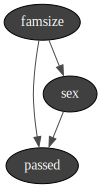

In [328]:
gnb.showBN(bn2)

In [329]:
print(bn2.cpt(passed))


             ||  passed           |
sex   |famsiz||yes      |no       |
------|------||---------|---------|
M     |LE3   || 0.6935  | 0.3065  |
F     |LE3   || 0.7115  | 0.2885  |
M     |GT3   || 0.7120  | 0.2880  |
F     |GT3   || 0.6154  | 0.3846  |



In [330]:
learner


(pyAgrum.BNLearner<double>@000001FBABE6E650) Filename       : C:\Users\ADEEBG~1\AppData\Local\Temp\tmpkeaqku26.csv
Size           : (395,3)
Variables      : sex[2], passed[2], famsize[2]
Induced types  : False
Missing values : False
Algorithm      : Greedy Hill Climbing
Score          : Log2Likelihood
Correction     : MDL  (Not used for score-based algorithms)
Prior          : -